<a href="https://colab.research.google.com/github/GeniusPlums/GeniusPlums/blob/main/Algobot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas_ta

     |████████████████████████████████| 115 kB 5.3 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=ae763c78d5593fc2e540b464fa3157abcf152a1470dada8b1c537bff3f2441c1
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2021-11-12 12:25:58--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-11-12 12:25:58--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-11-12 12:25:58--  http://iweb.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving iweb.dl.sourceforge.n

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 8.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=d95ec46809bdcaba23fa7ce7602715c6847e1a1fb1d2e7d24a2495debbdbccd0
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
pip install numpy

In [ ]:
import pandas as pd
import pandas_ta as ta
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import requests
from math import floor
from termcolor import colored as cl

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.DataFrame()
df = df.ta.ticker('RELIANCE.NS', period = '5y')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-11-15,480.934740,482.623908,472.754268,475.577606,6685965,0.0,0.0
2016-11-16,480.210807,481.079522,473.309262,476.132629,7638174,0.0,0.0
2016-11-17,475.867183,481.731082,470.268739,471.885529,5827994,0.0,0.0
2016-11-18,475.384547,479.100745,473.936689,476.591095,8382568,0.0,0.0
2016-11-21,476.615276,479.511022,474.515867,478.521637,6106766,0.0,0.0
...,...,...,...,...,...,...,...
2021-11-08,2519.399902,2520.000000,2456.399902,2501.949951,9385607,0.0,0.0
2021-11-09,2505.000000,2528.899902,2487.050049,2521.699951,7237470,0.0,0.0
2021-11-10,2516.699951,2558.000000,2503.649902,2549.899902,4731975,0.0,0.0


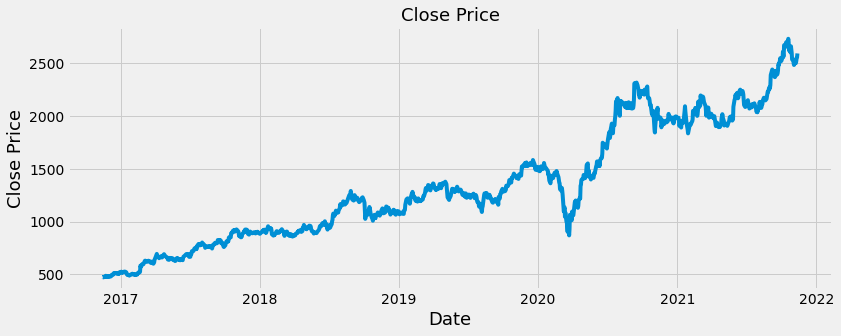

In [ ]:
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize = 18)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.show()

In [ ]:
ShortEMA = df.Close.ewm(span=20, adjust= False).mean()
MediumEMA = df.Close.ewm(span=50, adjust= False).mean()
LongEMA = df.Close.ewm(span=100, adjust= False).mean()
VeryLongEMA = df.Close.ewm(span=200, adjust= False).mean()

In [ ]:
MA5 = df.Close.rolling(5).mean()
MA34 = df.Close.rolling(34).mean()

In [ ]:
def sma(price, period):
    sma = price.rolling(period).mean()
    return sma

def ao(price, period1, period2):
    median = price.rolling(2).median()
    short = sma(median, period1)
    long = sma(median, period2)
    10 = short - long
    10_df = pd.DataFrame(ao).rename(columns = {'Close':'10'})
    return 10_df

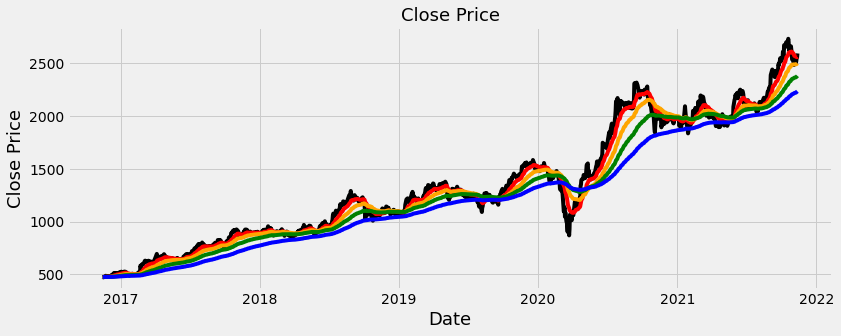

In [ ]:
RELIANCE = ('RELIANCE.NS')
plt.figure(figsize=(12.2, 4.5))
plt.title('Close Price', fontsize = 18)
plt.plot(df['Close'], label= 'Close Price', color = 'black')
plt.plot(ShortEMA, label= '20 EMA', color = 'red')
plt.plot(MediumEMA, label= '50 EMA', color = 'orange')
plt.plot(LongEMA, label= '100 EMA', color = 'green')
plt.plot(VeryLongEMA, label= '200 EMA', color = 'blue')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)

plt.show()

TypeError: ignored

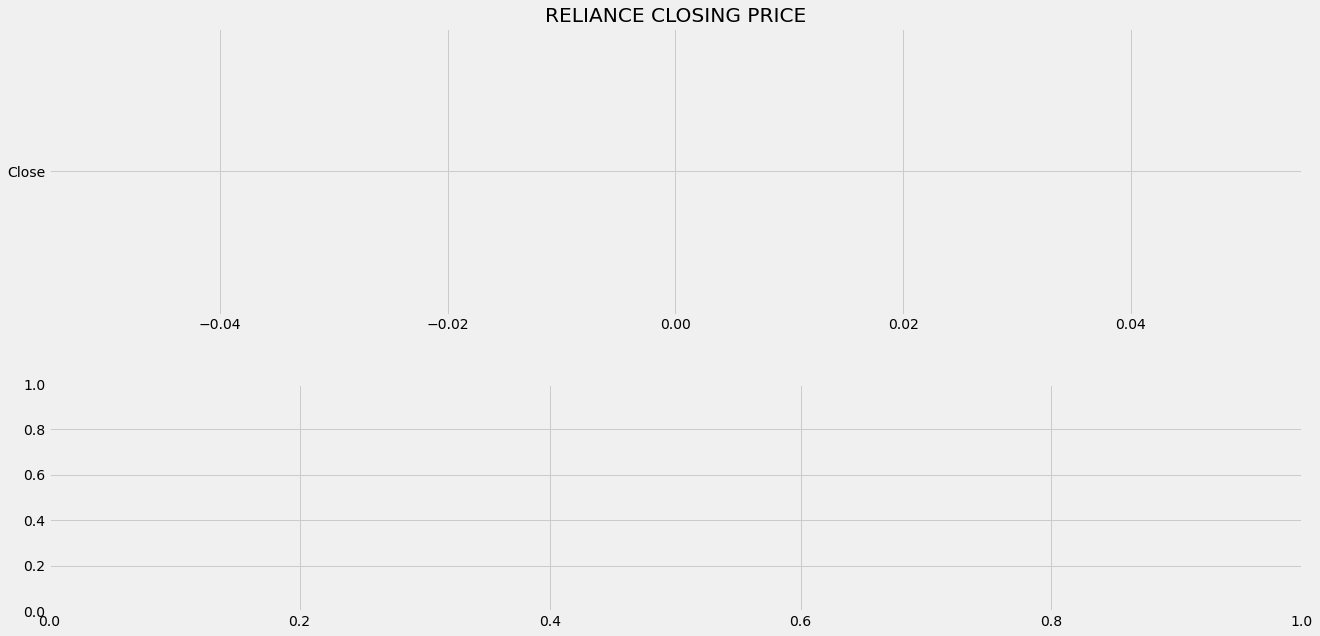

In [ ]:
RELIANCE = ('RELIANCE.NS')
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((10,1), (6,0), rowspan = 4, colspan = 1)
ax1.plot('Close')
ax1.set_title('RELIANCE CLOSING PRICE')
for i in range(len(RELIANCE)):
    if RELIANCE[10][i-1] > RELIANCE[10][i]:
        ax2.bar(RELIANCE.index(i), RELIANCE(10)(i), color = '#f44336')
    else:
        ax2.bar(RELIANCE.index(i), (RELIANCE(10)(i)), color = '#26a69a')

plt.show()

https://medium.com/codex/bitcoin-trade-automation-with-awesome-oscillator-in-python-51f2c52c5b25#:~:text=The%20Awesome%20Oscillator%20is%20plotted%20in%20the%20form,Oscillator%20fluctuates%20above%20and%20below%20the%20zero%20line.

https://school.stockcharts.com/doku.php?id=technical_indicators:bollinger_band_perce#:~:text=%25B%20is%20between%200%20and%20.50%20when%20price,on%20the%20default%20setting%20for%20Bollinger%20Bands%20%2820%2C2%29.

'#26a69a'

In [ ]:
df['Short'] = ShortEMA
df['Medium'] = MediumEMA
df['Long'] = LongEMA
df['Very Long'] = VeryLongEMA

In [ ]:
df